# Fractals and Chaos

The foundation of this notebook(s?) is book [PL] <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") written by <i>Jacek Kudrewicz</i>.

I will not copy book's text into a notebook. The only exception are the equations. I will preserve the chapter titles so if you are interested in the topic, you may follow my code with the book. Purpose of my work here is to better understand the topic so sometimes I may try something what is not coverd in the book (and I will write about it).

The book has 13 chapters:
1. Examples of Fractals
2. Iterated Function System (IFS)
3. Probabilistic IFS algorithm
4. Images Storing and Processing
5. Dimensions: Fractal's, Hausdorff's and Topological
6. Dynamic systems
7. Feigenbaum's Bifurcations
8. Horseshoe Map
9. Examples of Strange Attractors
10. Devil-staircase
11. KAM-theory
12. Complex Functions. Julia Set.
13. Mandelbrot Set.

## Literature:

#### Base:
* <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") by <i>Jacek Kudrewicz</i>.

#### Additional:
* Geometric Series - Wikipedia: https://en.wikipedia.org/wiki/Geometric_series#Formula
* Koch's Curve implementation: "Nature of Code" by Daniel Shiffman (http://natureofcode.com/book/)
* Sierpinski Carpet - Wikipedia: https://en.wikipedia.org/wiki/Sierpinski_carpet
* Mandelbrot Set implementation - Wikipedia: https://en.wikipedia.org/wiki/Mandelbrot_set#Escape_time_algorithm
* Julia Set implementation - Wikipedia: https://en.wikipedia.org/wiki/Julia_set#Pseudocode

## Chapter 1: Examples of Fractals

In [1]:
%matplotlib inline
# import of basic libraries
import math
import numpy as np
import matplotlib.pyplot as plt

### Example 1.1: Cantor Set

In [2]:
class CantorSet:
    
    def __init__(self, base_length):
        self.base_length = base_length
        self.cantor_set = []
        self.line_length_test = base_length

    def generate_lines(self, points, limit):
        level = limit
        line_x1 = points[0]
        line_x2 = points[1]
        line_length = line_x2 - line_x1
        if limit > 0:
            if self.line_length_test > line_length:
                self.line_length_test = line_length
            
            start_point_a = line_x1
            end_point_a = line_x1 + 0.33 * line_length
            start_point_b = line_x1 + 0.67 * line_length
            end_point_b = line_x1 + line_length
            
            self.cantor_set.append([[start_point_a, end_point_a], level - 1]) # first line below
            self.cantor_set.append([[start_point_b, end_point_b], level - 1]) # second line below
            try:
                self.generate_lines([start_point_a, end_point_a], limit - 1)
                self.generate_lines([start_point_b, end_point_b], limit - 1)
            except RecursionError:
                print('RecursionError, last line length was:', self.line_length_test)
                print('RecursionError, last line limit was:', limit)

    def prepare_cantor_set(self, limit=3, depth=None):

        # Perform calculations of line segments
        baseline = [0, self.base_length]
        self.cantor_set.append([baseline, limit])
        self.generate_lines(baseline, limit)
        

In [3]:
my_set = CantorSet(5)
my_set.prepare_cantor_set(limit = 5)


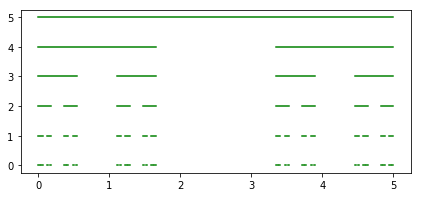

In [4]:
fig1 = plt.figure(figsize=(7, 3))
ax1 = fig1.add_subplot(111)

for line in my_set.cantor_set:
    ax1.plot([line[0][0], line[0][1]], [line[1], line[1]], color = 'green')

### Mathematical background

* <b>Sum of white spaces is going to 1</b>. 

With every new iteration area without points is larger and larger. Cantor set is an example of geometric sequence. If you know limits and geometric sequences (pre-calculus level of math) you can calculte the sum of the sequence in infinity. The main observation is that we always remove 1/3rd of existing points and 2/3rd of them are preserved:

> First iteration: 1/3 from 1 = 1/3

> Second iteration: 1/3 from (1 - 1/3) = 2/9

> Third iteration: 1/3 from (2/3 - 2/9) = 4/27


So the rule is:

$$\sum_{n=0}^\infty \frac{2^{(n-1)}}{3^n}$$

The series may be rewritten as:

$$\sum_{n=1}^\infty \frac{2^{(n-1)}}{3^n} = \frac{1}{3} * \sum_{n=0}^\infty ({\frac{2}{3}})^{n}$$

Then it can be seen that:

> The common ratio of the series is 2/3

> The first term of series is (2/3)^0 = 1

Based on the formula presented here: https://en.wikipedia.org/wiki/Geometric_series#Formula we can calculate the lenght of the removed line after infinite steps:

$$\frac{1}{3} * \sum_{n=0}^\infty ({\frac{2}{3}})^{n} = \frac{1}{3} * \frac{1}{1-\frac{2}{3}} = 1$$

### Mathematical background from computer science perspective

Below programming proof that after infinite number of divisions the lenght of removed points is going to be 1:

In [5]:
def length_of_removed(n=10):
    length = 0
    for i in range(0, n):
        length = length + (2**i)/(3**i)
    length = 1/3 * length
    print('Length after {} iterations is equal to {}'.format(
    n, length))
    return length

In [6]:
length_of_removed(1)
length_of_removed(5)
length_of_removed(10)
length_of_removed(50)

Length after 1 iterations is equal to 0.3333333333333333
Length after 5 iterations is equal to 0.8683127572016459
Length after 10 iterations is equal to 0.9826584700841671
Length after 50 iterations is equal to 0.9999999984316712


0.9999999984316712

## Example 1.2: Koch's curve

I've implemented Koch's curve earlier here: https://github.com/szymon-datalions/playing_with_python/blob/master/algorithms/fractals/Koch%20Curve.ipynb based on the book "Nature of Code" by Daniel Shiffman (http://natureofcode.com/book/). Book covers fractals and different topics related to the computing and physics. Code in the book is written in Processing language (Java derivative) but it is very easy to understand. The huge help comes from the book content, where author describes all cases in detail.

In [7]:
class KochLine:
    
    def __init__(self, start, end):
        self.x0 = start[0]
        self.y0 = start[1]
        self.x1 = end[0]
        self.y1 = end[1]
        self.lines = []
        self.young_generation = []
        
    def __str__(self):
        return 'Start point is ({x0}, {y0}). End point is ({x1}, {y1}).'.format(
        x0 = self.x0, y0 = self.y0, x1 = self.x1, y1 = self.y1)
    
    def __repr__(self):
        return 'Start point is ({x0}, {y0}). End point is ({x1}, {y1}).'.format(
        x0 = self.x0, y0 = self.y0, x1 = self.x1, y1 = self.y1)
    
    def add_koch_line(self):
        self.lines.append(KochLine([self.x0, self.y0], [self.x1, self.y1]))
    
    def draw_koch_line(self):
        
        fig1 = plt.figure(figsize=(7, 3))
        ax1 = fig1.add_subplot(111)
    
        for line in self.lines:
            ax1.plot([line.x0, line.x1], [line.y0, line.y1])
        
    def generate_koch_line(self):
        
        new_lines = self.lines

        for line in new_lines:
            
            a = self.compute_line('a', line)
            b = self.compute_line('b', line)
            c = self.compute_line('c', line)
            d = self.compute_line('d', line)
            e = self.compute_line('e', line)
            
            self.young_generation.append(KochLine(a, b))
            self.young_generation.append(KochLine(b, c))
            self.young_generation.append(KochLine(c, d))
            self.young_generation.append(KochLine(d, e))

        self.lines = self.young_generation
        self.young_generation = []
    
    def compute_line(self, l, line_part):
        computing_dict = {
            'a': [line_part.x0, line_part.y0],
            'b': self.vector_b_calc([line_part.x0, line_part.y0], [line_part.x1, line_part.y1]),
            'c': self.vector_c_calc([line_part.x0, line_part.y0], [line_part.x1, line_part.y1]),
            'd': self.vector_d_calc([line_part.x0, line_part.y0], [line_part.x1, line_part.y1]),
            'e': [line_part.x1, line_part.y1]
        }
        return computing_dict[l]   
        
    def vector_b_calc(self, start, end):
        z = np.array(end)
        a = np.array(start)
        x = z - a
        x = x / 3.0
        x = a + x
        return [x[0], x[1]]
    
    def vector_d_calc(self, start, end):
        z = np.array(end)
        a = np.array(start)
        x = z - a
        x = x * (2/3)
        x = a + x
        return [x[0], x[1]]
    
    def vector_c_calc(self, start, end):
        length = np.sqrt((end[0] - start[0])**2 + (end[1] - start[1])**2)
        length = length / 3.0
        
        ending = self.vector_d_calc(start, end)
        beginning = self.vector_b_calc(start, end)
        
        angle = 60
        theta = (angle / 180) * np.pi
        cos_angle = np.cos(theta)
        sin_angle = np.sin(theta)
        xExB = ending[0] - beginning[0]
        yEyB = ending[1] - beginning[1]
        
        x1 = beginning[0] + cos_angle * (xExB) - sin_angle * (yEyB)
        y1 = beginning[1] + sin_angle * (xExB) + cos_angle * (yEyB)

        x = [x1, y1]
        return x

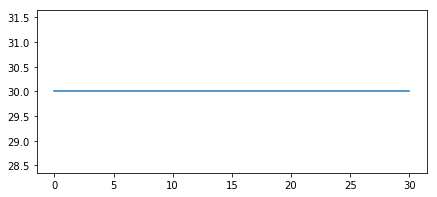

In [8]:
length = 30
sp = [0, length]
fp = [length, length]

b = KochLine(fp, sp)
b.add_koch_line()
b.draw_koch_line()

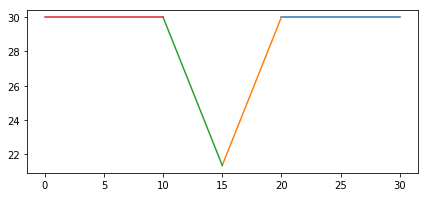

In [9]:
b.generate_koch_line()
b.draw_koch_line()

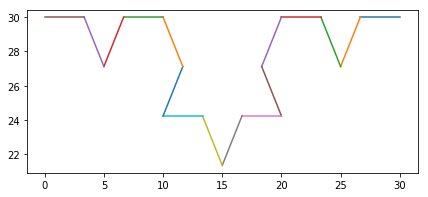

In [10]:
b.generate_koch_line()
b.draw_koch_line()

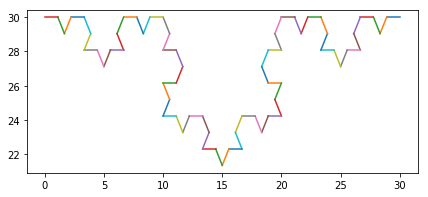

In [11]:
b.generate_koch_line()
b.draw_koch_line()

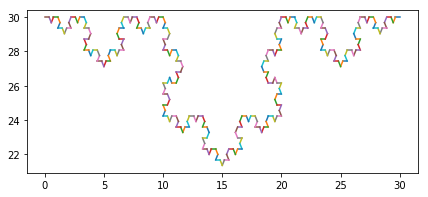

In [12]:
b.generate_koch_line()
b.draw_koch_line()

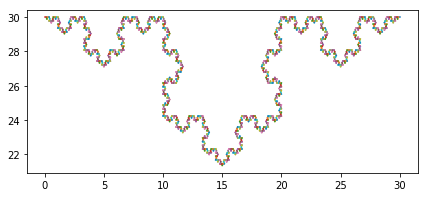

In [13]:
b.generate_koch_line()
b.draw_koch_line()

## Example 1.3: Sierpinski carpet

Third example is more interesting because this time area will be analysed (not lines). Sierpinski carpet is described here: https://en.wikipedia.org/wiki/Sierpinski_carpet
Spatial pattern of the Sierpinski carpet is an intersting area to explore numpy functions. It will be too hard to create it in the classic Python's lists.

In [14]:
class SierpinskiCarpet:
    
    def __init__(self, number_of_iterations=3):
        # Calculate size of np.array
        self.steps = number_of_iterations
        self.size = 3**number_of_iterations
        self.canvas = []
        
    def create_canvas(self):
        self.canvas = np.ones((self.size, self.size), dtype=int)
    
    def show_canvas(self):
        fig = plt.figure(figsize=(12,12))
        plt.imshow(self.canvas, cmap='gray')
        plt.show()
        
    @staticmethod
    def find_satellite_points(point, distance):
        # find new distance and store it
        if distance == 1:
            new_distance = 0
        else:
            new_distance = int((3**(distance-1)) / 2)
        
        # find all satellite points
        d = 3**distance
        list_of_points = []
        for p in point:
            pA = [p[0] - d, p[0], p[0] + d]
            pB = [p[1] - d, p[1], p[1] + d]
            for x in pA:
                for y in pB:
                    if [x, y] != [p[0], p[1]]:
                        list_of_points.append([x, y])
        list_of_points.append(new_distance)
        return list_of_points
    
    @staticmethod
    def prepare_neighbours(pts, dist):
        full_array = []
        for p in pts:
            for i in range(p[0] - dist, p[0] + dist + 1):
                for j in range(p[1] - dist, p[1] + dist + 1):
                    full_array.append([i, j])
        return full_array
        
    def prepare_points(self):
        # The idea behind algorithm is explained after the code - it will be not clear if I write it here
        i = self.steps
        
        # Define first point
        middle = int(np.ceil(self.size/2))
        first_point = [middle, middle]
        first_n_distance = int((3**(i-1)) / 2)
        points = {i: [first_point, first_n_distance]}
        
        # Define the rest of points
        x = points[i]
        i = i - 1
        while i > 0:
            x = self.find_satellite_points(x[:-1], i)
            points[i] = x
            i = i - 1
        return points
        
    def fill_matrix(self, points_dict):
        for key in points_dict:
            array_of_vals = points_dict[key][:-1]
            neighbours = points_dict[key][-1]
            if neighbours > 0:
                array_of_vals = self.prepare_neighbours(array_of_vals, neighbours)
            for val in array_of_vals:
                self.canvas[val[0]-1, val[1]-1] = 0
        
    def create_carpet(self):
        # The first part is to prepare dict with points to fill
        filled_points = self.prepare_points()
        # The second part is to fill matrix of ones by zeros
        self.fill_matrix(filled_points)
        return filled_points

In [15]:
my_carpet = SierpinskiCarpet(6)
my_carpet.create_canvas()
f = my_carpet.create_carpet()

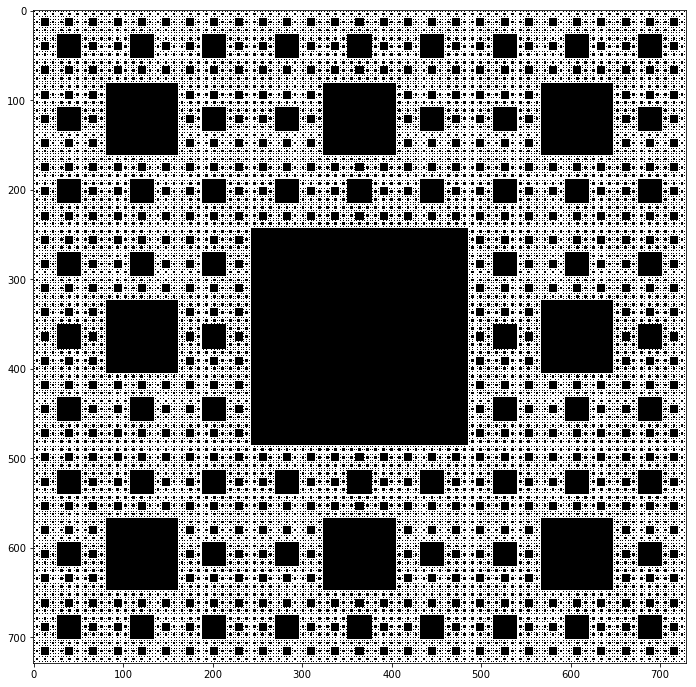

In [16]:
my_carpet.show_canvas()

In [17]:
# Here will be explanation how algorithm works :)

## Example 1.4: Mandelbrot set

It's time for the famous Mandelbrot set. Every time when I try to find an information about fractals I see the Mandelbrot set. This structure found a way to popular culture so it is hard to not know about it and to not implement it in the programming language which has in-built complex number type :) I'll implement pseudo-code from here: https://en.wikipedia.org/wiki/Mandelbrot_set#Escape_time_algorithm

In [18]:
def draw_mandelbrot_set(mtx_size = (1000, 1000), iterations=1000):
    x_min = -2.5
    x_max = 1
    y_min = -1
    y_max = 1
    step_x = (x_max - x_min) / mtx_size[1]
    step_y = (y_max - y_min) / mtx_size[0]
    x_val_range = np.arange(start=x_min, stop=x_max, step=step_x)
    y_val_range = np.arange(start=y_min, stop=y_max, step=step_y)
    mtx = np.zeros(mtx_size)
    
    for idy, row in enumerate(mtx):
        for idx, col in enumerate(row):
            c = complex(x_val_range[idx], y_val_range[idy])
            z = complex(0, 0)
            i = 0
            max_i = iterations
            while((abs(z) < 4) and (i < max_i)):
                z = z**2 + c
                i = i + 1
            if i < max_i:
                mtx[idy, idx] = i
            else:
                mtx[idy, idx] = 0
    return mtx / mtx.max()

In [19]:
x = draw_mandelbrot_set(mtx_size=(1000, 2000), iterations=256)

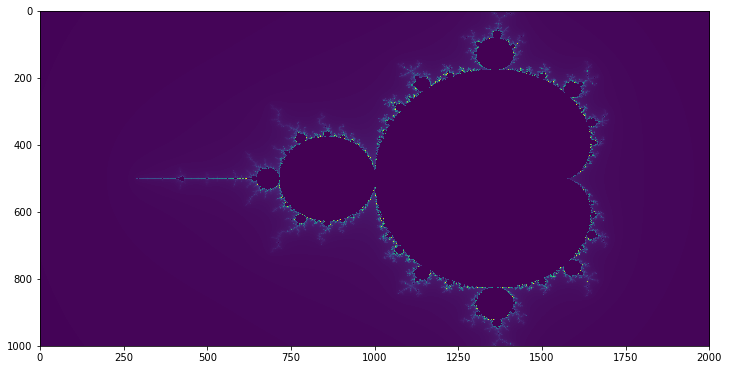

In [20]:
plt.figure(figsize=(12, 16))
plt.imshow(x, cmap='viridis')
plt.show()

## Example 1.5: Julia set

The next example is the Julia set. In the first chapter are presented only examples of fractals so there is no place for theory (at this point I really do not know what I can write :) ) so I will go directly to the programming. As with the Mandelbrot set I am using Wikipedia pseudocode for generating my first Julia set - later I will explore more robust methods. Source of pseudocode: https://en.wikipedia.org/wiki/Julia_set#Pseudocode

In [21]:
def draw_julia_set(mtx_size = (1000, 1000), iterations=100):
    x_min = -2.5
    x_max = 1
    y_min = -1
    y_max = 1
    step_x = (x_max - x_min) / mtx_size[1]
    step_y = (y_max - y_min) / mtx_size[0]
    x_val_range = np.arange(start=x_min, stop=x_max, step=step_x)
    y_val_range = np.arange(start=y_min, stop=y_max, step=step_y)
    mtx = np.zeros(mtx_size)
    c = complex(-0.8, 0.156)
    
    for idy, row in enumerate(mtx):
        for idx, col in enumerate(row):
            z = complex(x_val_range[idx], y_val_range[idy])
            i = 0
            max_i = iterations
            
            while((abs(z) < 4) and (i < max_i)):
                z = z**2 + c
                i = i + 1
                
            if i < max_i:
                mtx[idy, idx] = i
            else:
                mtx[idy, idx] = 0
    return mtx / mtx.max()

In [22]:
x = draw_julia_set(mtx_size=(1000, 1000))

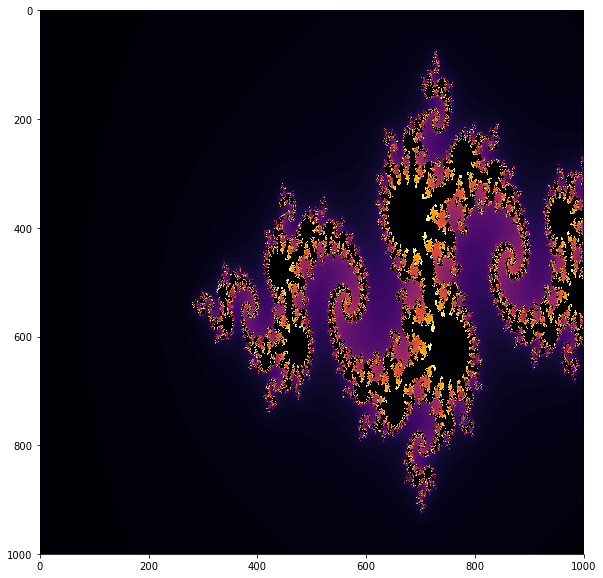

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(x, cmap='inferno')
plt.show()

## Example 1.6: Iterated Function Systems

The last example presented in the book is a spiral generated with sequence of two pairs of equations:

<b>Pair 1:</b>
$$x_{1} = -0.4*x - 1$$
$$y_{1} = -0.4*y + 0.1$$

<b>Pair 2:</b>
$$x_{2} = 0.76*x - 0.4*y$$
$$y_{2} = 0.4*x + 0.76*y$$

In each iteration we randomly choose one pair of functions and calculate a new point positions.

In [12]:
def prepare_ifs(number_of_iterations, start_point=[0, 0]):
    points = [start_point]
    for i in range(number_of_iterations):
        test = np.random.choice([True, False])
        dx = points[-1][0]
        dy = points[-1][1]
        if test:
            x = -0.4 * dx - 1
            y = -0.4 * dy + 0.1
        else:
            x = 0.76 * dx - 0.4 * dy
            y = 0.4 * dx + 0.76 * dy
        points.append([x, y])
    scale_factor = 1000
    points = np.asarray(points)
    points = points * scale_factor
    points = points.astype(int)
    
    # Draw matrix
    col_min = -1.25
    col_max = 0.55
    row_min = -0.8
    row_max = 0.5
    rows = int(scale_factor * (row_max - row_min) + 1)
    cols = int(scale_factor * (col_max - col_min) + 1)
    mtx = np.zeros(shape=(rows, cols))
    draw_points = points[:, :]
    draw_points[:, 0] = draw_points[:, 0] + abs(col_min) * scale_factor
    draw_points[:, 1] = draw_points[:, 1] + abs(row_min) * scale_factor
    
    for point in draw_points:
        try:
            mtx[point[1], point[0]] = 1
        except IndexError:
            pass

    return mtx

In [16]:
pts = prepare_ifs(10000000)

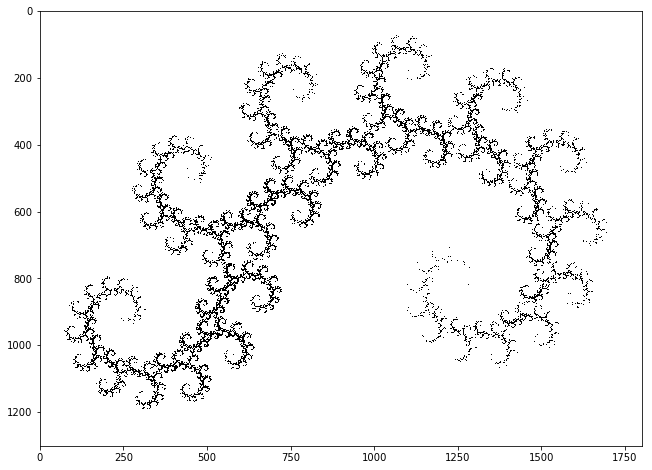

In [17]:
plt.figure(figsize=(15, 8))
plt.imshow(pts, cmap='binary')
plt.show()

#### Summary:

In this chapter I've prepared a code for few types of fractals. From the easiest (Cantor Set) through the very complicated (Julia's Set). I've learnt that fractals have three properties:

* They are non-parametric and it is impossible to derive a tight function to describe them. They are described by the recursive dependencies.
* They have the self-similarity property.
* Their dimension is not an integer number.

Fractals are close to the nature. Many objects from the real world have fractal geometry (<i>The Fractal Geometry of Nature</i>, B. Mandelbrot).

Ok, the first two properties of fractals are not enough to describe some object as a fractal. Unit circle in polar plane may be described as the points set by recursive steps. Self-similarity is visible for the simplest geometric objects too (every part of line is similar to it). The most interesting property is the fractal dimension (and it will be covered in the chapter 5).

> The next chapter (2) will be covered in the new notebook. And it will be more detailed than the introduction.

-----

<i>Things to correct in this notebook</i>:
- Sierpinski carpet / drawing methodology